# GERANDO O MODELO DE SÉRIE TEMPORAL PARA LICENCIAMENTOS CAMINHÕES NACIONAL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando os dados
df = pd.read_excel('LIC_CAMIN_NAC_MES_JULHO_2023.xlsx', index_col=0, parse_dates=True)
y = df.iloc[:, 0]

In [3]:
df

,lic_cam_nac
mês,
1990-01-01,3554
1990-02-01,4567
1990-03-01,2157
1990-04-01,2808
1990-05-01,3689
...,...
2023-07-01,7811
2023-08-01,8600
2023-09-01,8207


Text(0.5, 1.0, 'Licenciamentos Caminhões Nacional JANEIRO 1990 a NOVEMBRO 2023')

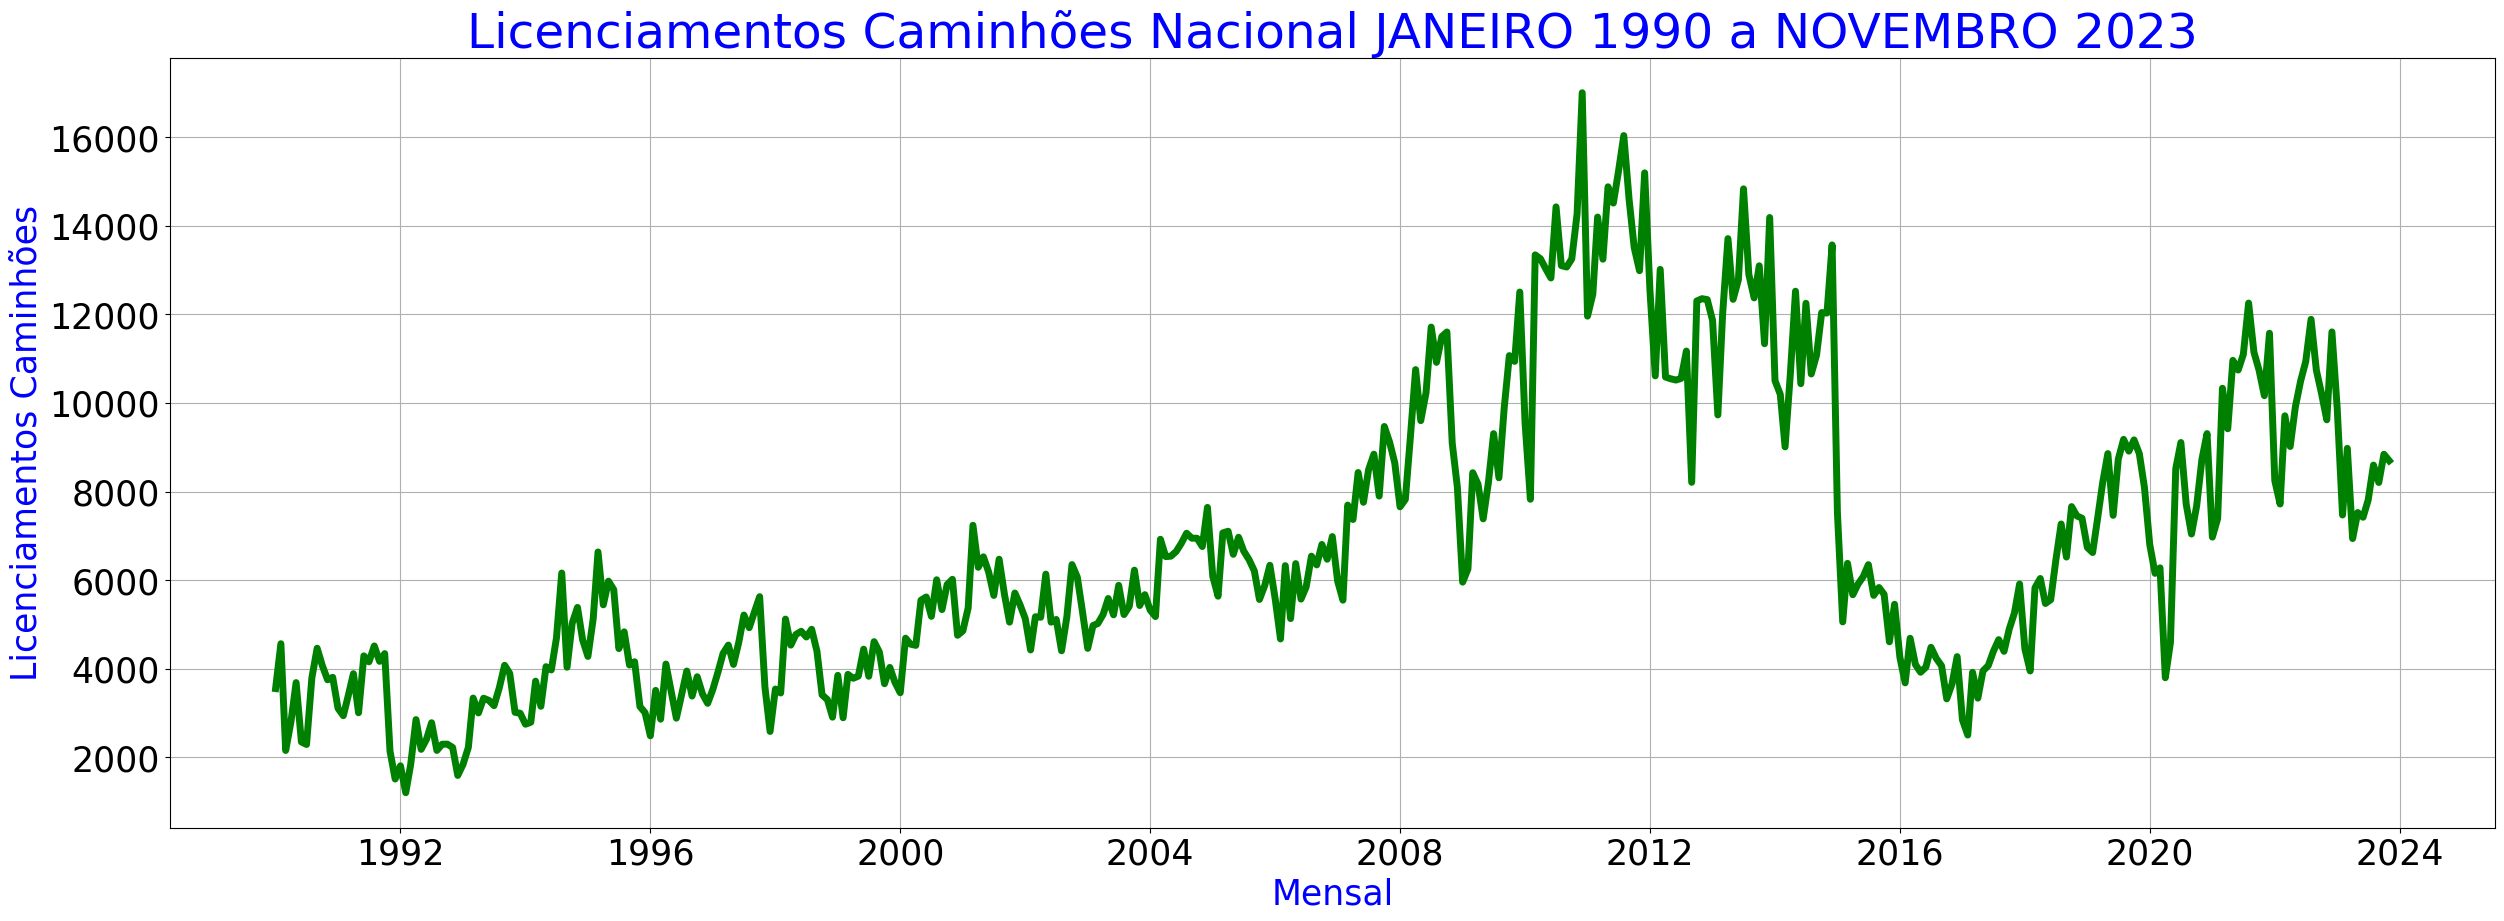

In [4]:
plt.figure(figsize = (30, 10))
sns.lineplot(data=df, x="mês", y="lic_cam_nac", color= 'g', linewidth = 5)
plt.xlabel('Mensal', color = 'b', fontsize = 25)
plt.ylabel('Licenciamentos Caminhões', color = 'b', fontsize = 25)
plt.grid(True)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  ='black', labelsize = '25')
plt.tick_params(axis = 'y', colors = 'black', labelsize = '25')


plt.title('Licenciamentos Caminhões Nacional JANEIRO 1990 a NOVEMBRO 2023', color = 'b', fontsize = 35)

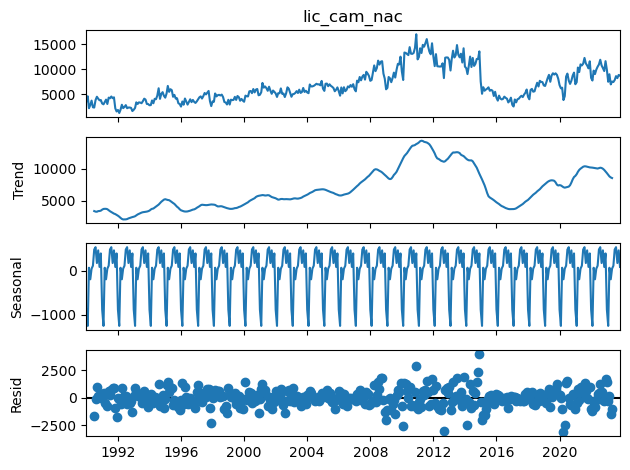

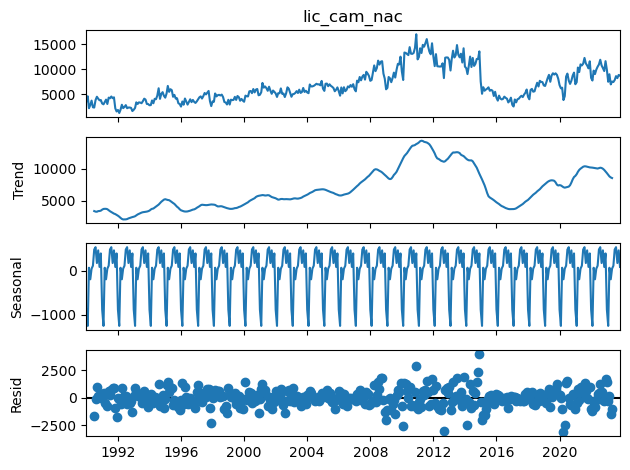

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform the decomposition
result = seasonal_decompose(df['lic_cam_nac'], model='additive')
# Plot the decomposition
result.plot()

Sazonalidade é uma situação ou um fenômeno que costuma ocorrer na mesma época do ano, sempre com características similares. No mundo empresarial, esse termo faz referência a fatores externos que se repetem ao longo do ano e podem afetar os resultados financeiros.



In [63]:
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Assuming 'df' is your DataFrame with a column 'lic_cam_nac'
# Perform the decomposition
result = seasonal_decompose(df['lic_cam_nac'], model='additive')

# Create Plotly figure
fig_seasonal = go.Figure()

# Add the original time series
fig_seasonal.add_trace(go.Scatter(x=df.index, y=df['lic_cam_nac'], mode='lines', name='Original'))

# Add the trend component
fig_seasonal.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'))

# Add the seasonal component
fig_seasonal.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'))


# Update layout
fig_seasonal.update_layout(title='Seasonal Decomposition',
                  xaxis_title='Date',
                  yaxis_title='Value')

# Show the plot
fig_seasonal.show()


In [7]:
# Aplicando a suavização exponencial Holt-Winters
modelo = ExponentialSmoothing(df, trend='add', seasonal='add', seasonal_periods=12)
resultado = modelo.fit()

O método de suavização exponencial Holt-Winters é um método recursivo de previsão que modifica as previsões em resposta ao comportamento de séries temporais. Ele é capaz de lidar com dados sazonais e é conhecido como método de suavização exponencial tripla. O método é baseado em três componentes: nível, tendência e sazonalidade¹. O modelo é atualizado a cada período de tempo e é composto por três equações que atualizam as estimativas do nível, tendência e sazonalidade.

In [8]:
# Realizando previsões futuras
previsao = resultado.forecast(36)
print(previsao)

2023-12-01     9507.034685
2024-01-01     7321.432812
2024-02-01     6568.369282
2024-03-01     8318.498534
2024-04-01     7842.654106
2024-05-01     8805.657674
2024-06-01     9164.298671
2024-07-01     9757.762459
2024-08-01     9881.320745
2024-09-01     9092.533363
2024-10-01     9399.644649
2024-11-01     9265.103352
2024-12-01    10144.594937
2025-01-01     7958.993064
2025-02-01     7205.929534
2025-03-01     8956.058786
2025-04-01     8480.214359
2025-05-01     9443.217926
2025-06-01     9801.858923
2025-07-01    10395.322711
2025-08-01    10518.880997
2025-09-01     9730.093615
2025-10-01    10037.204901
2025-11-01     9902.663604
2025-12-01    10782.155189
2026-01-01     8596.553316
2026-02-01     7843.489786
2026-03-01     9593.619038
2026-04-01     9117.774611
2026-05-01    10080.778178
2026-06-01    10439.419175
2026-07-01    11032.882963
2026-08-01    11156.441249
2026-09-01    10367.653867
2026-10-01    10674.765153
2026-11-01    10540.223856
Freq: MS, dtype: float64


REALIZADO JAN A NOV 2023 = 90.382 LICENCIAMENTOS + PREVISÃO MODELO DEZ 2023 = 9.507...ENTÃO 2023 SERÁ = 99.889 LICENCIAMENTOS DECRESCIMENTO DE 16.9% (2022 = 120133)

PREVISÃO 2024 = 105.562 LICENCIAMENTOS...CRESCIMENTO 5,7% EM RELAÇÃO A PREVISÃO PARA 2023

PREVISÃO 2025 = 113.213 LICENCIAMENTOS...CRESCIMENTO 7,2% EM RELAÇÃO A PREVISÃO PARA 2024

In [9]:
writer = pd.ExcelWriter('previsao_liccamout2023.xlsx')

# Exporte os DataFrames para o mesmo arquivo Excel em planilhas diferentes
previsao.to_excel(writer, sheet_name='Previsão 1', index=False)

# Salve o arquivo Excel
writer.save()

In [10]:
# FAZER PREVISÃO DA AMOSTRA
y_pred = resultado.fittedvalues
print(y_pred)

mês
1990-01-01    2595.187500
1990-02-01    3060.782851
1990-03-01    4735.625817
1990-04-01    3467.022548
1990-05-01    3036.937093
                 ...     
2023-07-01    8362.520386
2023-08-01    8017.466598
2023-09-01    7551.113867
2023-10-01    8239.309371
2023-11-01    8532.544658
Length: 407, dtype: float64


In [11]:
writer = pd.ExcelWriter('y_pred_liccamJULHO2023.xlsx')

# Exporte os DataFrames para o mesmo arquivo Excel em planilhas diferentes
y_pred.to_excel(writer, sheet_name='Previsão 1', index=False)

# Salve o arquivo Excel
writer.save()

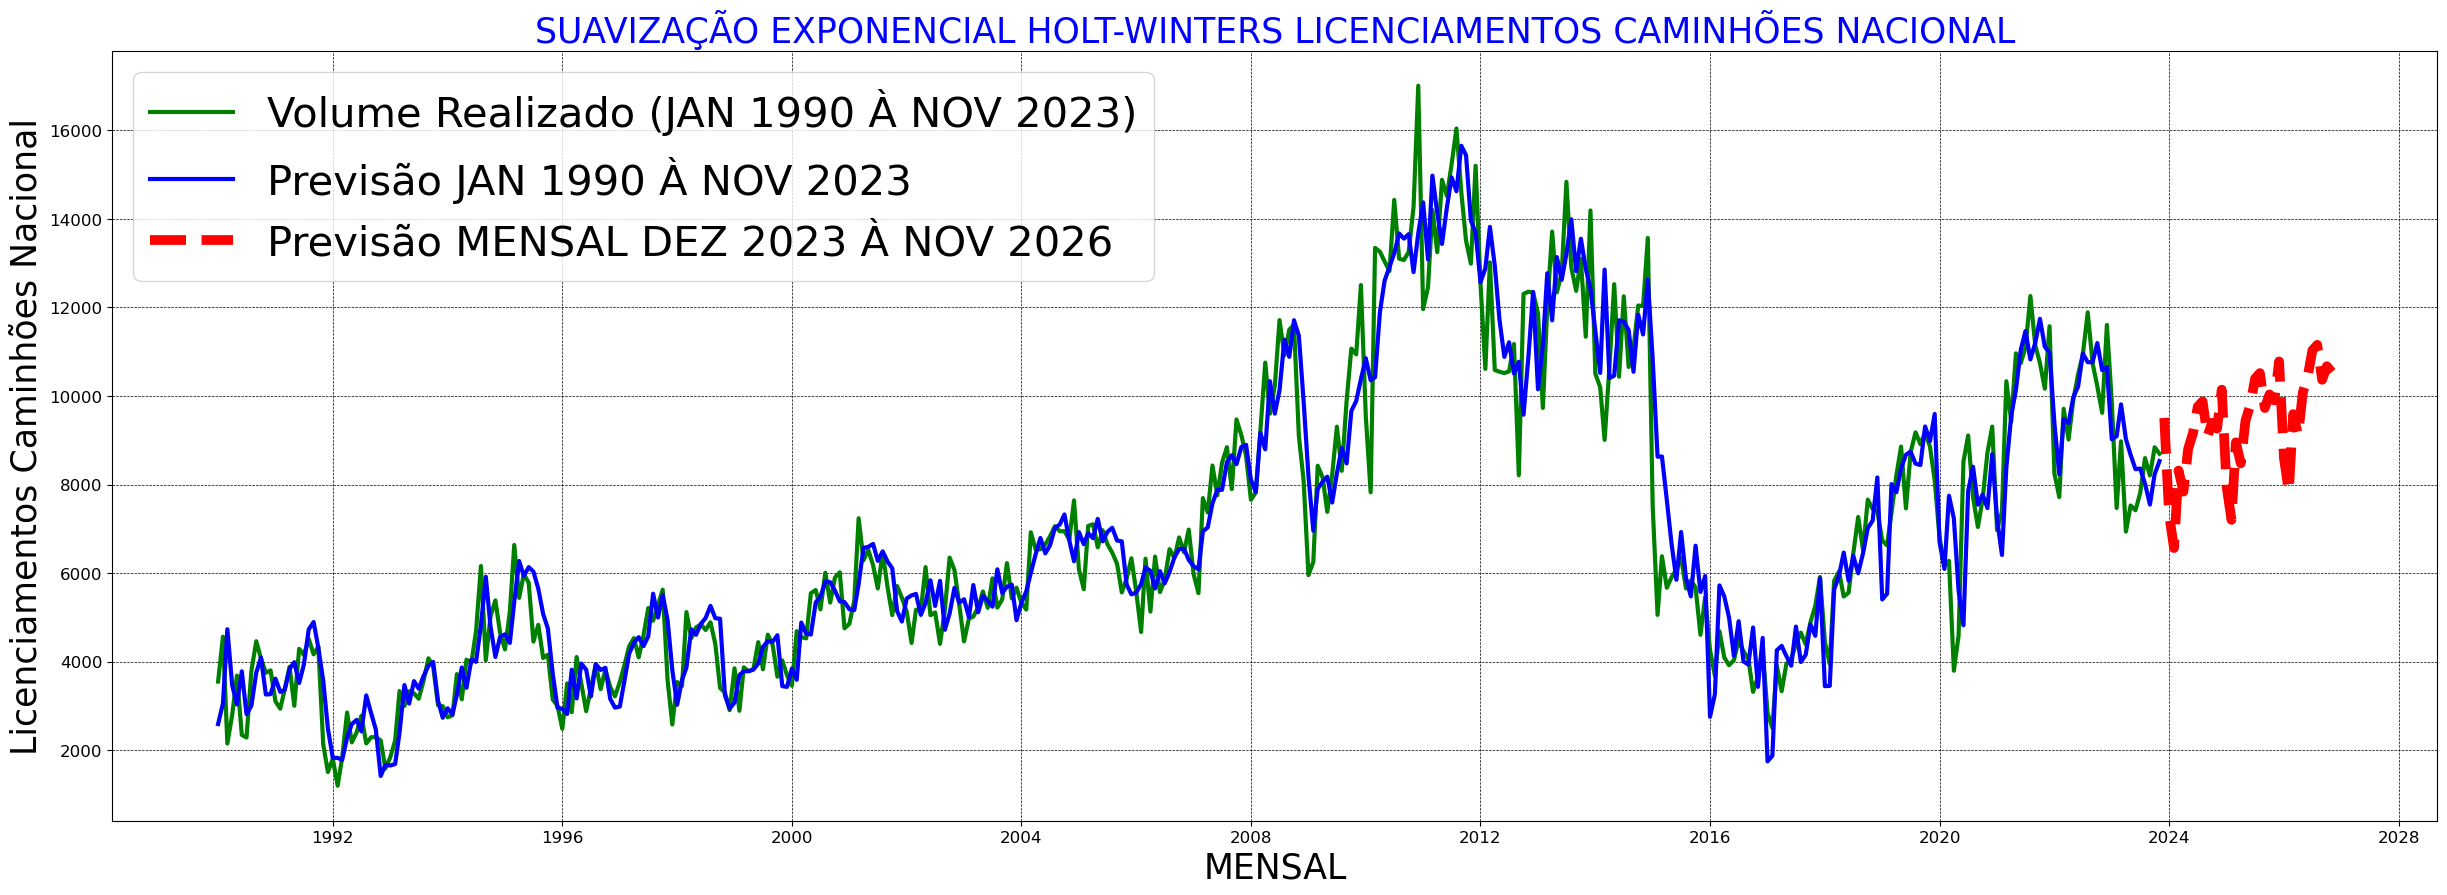

In [12]:
# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (30, 10))
plt.plot(df, label='Volume Realizado (JAN 1990 À NOV 2023)', color= 'g', linewidth = 3)
plt.plot(y_pred, label='Previsão JAN 1990 À NOV 2023', color= 'b', linewidth = 3)
plt.plot(previsao, label='Previsão MENSAL DEZ 2023 À NOV 2026', color='r', linestyle='dashed', linewidth = 7)

# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('w')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('MENSAL', color = 'black', fontsize = 25)
plt.ylabel('Licenciamentos Caminhões Nacional', color ='black', fontsize = 25)
plt.legend(fontsize = 30)
plt.title('SUAVIZAÇÃO EXPONENCIAL HOLT-WINTERS LICENCIAMENTOS CAMINHÕES NACIONAL', color = 'b', fontsize = 25)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  ='black', labelsize = 'large')
plt.tick_params(axis = 'y', colors = 'black', labelsize = 'large')

plt.show()

In [13]:
# CALCULAR MÉTRICAS DE ERROS
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)

In [14]:
# IMPRIMIR MÉTRICAS DE ERROS
print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('Mean absolute percentage error: ', mape)

Mean squared error:  931326.8132551466
Mean absolute error:  704.430703592423
Mean absolute percentage error:  0.12078369094099649


In [15]:
import math
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 965.052752


In [16]:
data1 = pd.read_excel('y_pred_prev_licam_JULHO_2023.xlsx')
data1

,mês,periodo,lic_cam_nac,y_pred,Unnamed: 4
0,1990-01-01,1.0,3554.0,2.595187e+03,NaN
1,1990-02-01,2.0,4567.0,3.060783e+03,NaN
2,1990-03-01,3.0,2157.0,4.735626e+03,NaN
3,1990-04-01,4.0,2808.0,3.467023e+03,NaN
4,1990-05-01,5.0,3689.0,3.036937e+03,NaN
...,...,...,...,...,...
404,2023-09-01,405.0,8207.0,7.551114e+03,NaN
405,2023-10-01,406.0,8845.0,8.239309e+03,NaN
406,2023-11-01,407.0,8699.0,8.532545e+03,NaN
407,NaT,NaN,2757136.0,2.786057e+06,28920.505278


In [17]:
# Calcule o viés como a diferença média entre as previsões e os valores reais
bias = data1['y_pred'].mean() - data1['lic_cam_nac'].mean()

# Calcule a razão do viés como o viés dividido pela média dos valores reais
bias_ratio = bias / data1['lic_cam_nac'].mean()

# Exiba o viés e a razão do viés
print('Viés:', bias)
print('Razão do Viés:', bias_ratio)

Viés: 141.7671827370832
Razão do Viés: 0.010489328520016775


O "viés da previsão" refere-se ao erro sistemático na previsão de um modelo, ou seja, uma tendência consistente do modelo de prever valores que são sistematicamente diferentes dos valores reais. Um valor positivo indica que as previsões são consistentemente mais altas do que os valores reais, enquanto um valor negativo indica que as previsões são consistentemente mais baixas do que os valores reais. o viés é baixo  licenciame 71.05775252669446 licenciamentos no periodo. Pense comigo...são 407 meses, então...71.05775252669446 x 407 meses = 28.921 licenciamentos que o realizado 2.757.136 licenciamentos, razão do viés 1,05% do total...um bom modelo...



In [18]:
# Calcule os resíduos subtraindo as previsões dos valores reais
residuals = y - y_pred
print(residuals)


mês
1990-01-01     958.812500
1990-02-01    1506.217149
1990-03-01   -2578.625817
1990-04-01    -659.022548
1990-05-01     652.062907
                 ...     
2023-07-01    -551.520386
2023-08-01     582.533402
2023-09-01     655.886133
2023-10-01     605.690629
2023-11-01     166.455342
Length: 407, dtype: float64


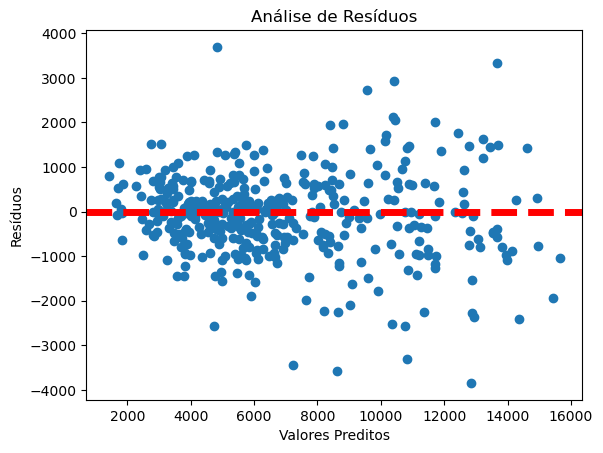

In [19]:
import matplotlib.pyplot as plt

# Crie um gráfico de dispersão dos resíduos
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth = 5)
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

In [20]:
# ler a planilha de dados
df1=pd.read_excel("prob_liccam_ano_JULHO_2023.xlsx")
df1

,lic_can_nac
0,41313
1,41464
2,25659
3,37769
4,50409
5,56963
6,40573
7,52305
8,49919
9,46906


In [21]:
import scipy.stats as stats
z_scores = df1.apply(stats.zscore)
z_scores

,lic_can_nac
0,-1.126732
1,-1.122644
2,-1.550564
3,-1.222686
4,-0.880458
5,-0.703009
6,-1.146768
7,-0.829124
8,-0.893725
9,-0.975302


In [22]:
from scipy.stats import norm
# Calculando a probabilidade de um valor de z-score
probabilidade = norm.cdf(z_scores)
# Exibindo o resultado
print(probabilidade)

[[0.12992786]
 [0.13079438]
 [0.06050314]
 [0.11072418]
 [0.18930554]
 [0.24102507]
 [0.12573882]
 [0.20351707]
 [0.18573451]
 [0.16470526]
 [0.28203303]
 [0.3683406 ]
 [0.29953124]
 [0.30748946]
 [0.46148541]
 [0.43180874]
 [0.39065697]
 [0.63093896]
 [0.83045945]
 [0.73792394]
 [0.97444979]
 [0.98998863]
 [0.91981115]
 [0.96773561]
 [0.92067056]
 [0.36545558]
 [0.17733599]
 [0.18748562]
 [0.4052176 ]
 [0.66057132]
 [0.53036262]
 [0.85996794]
 [0.84310867]
 [0.67695866]
 [0.7299981 ]
 [0.79387992]]


# PROBABILIDADE LICENCIAMENTOS CAMINHÕES NACIONAL 2023 >= 99.889 É 32,3%

# PROBABILIDADE LICENCIAMENTOS CAMINHÕES NACIONAL 2024 >= 105.562 É 27,0%

# PROBABILIDADE LICENCIAMENTOS CAMINHÕES NACIONAL 2025 >= 113.214 É 20,6%

# GERANDO ARIMA MODEL

In [23]:
import pandas as pd
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns
import warnings

In [24]:
df_1 = pd.read_excel('LIC_CAMIN_NAC_MES_JULHO_2023.xlsx', header=0, index_col=0, parse_dates=True)
y1 = df_1.iloc[:, 0]

In [25]:
df_1

,lic_cam_nac
mês,
1990-01-01,3554
1990-02-01,4567
1990-03-01,2157
1990-04-01,2808
1990-05-01,3689
...,...
2023-07-01,7811
2023-08-01,8600
2023-09-01,8207


In [26]:
# Definindo a frequência dos dados (diária, semanal, mensal, anual etc)
frequencia = 'MENSAL' # MENSAL

# Gerando o modelo de Auto-Arima

In [27]:
from pmdarima.arima import auto_arima
model = auto_arima(df_1, seasonal=True, m=12, suppress_warnings=True)
model.fit(y1)

ARIMA(order=(2, 1, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

Essa notação parece que você está especificando um modelo ARIMA sazonal. Deixe-me explicar melhor:

ARIMA(2,1,2):

2: sugere que há dois termos autorregressivos no modelo.
1: A primeira ordem de diferenciação indica que você tomou a primeira diferença da série para torná-la estacionária.
2: representa os termos de média móvel no modelo.
(1,0,1):

1: sugere um termo autorregressivo de primeira ordem na parte sazonal.
0: Não há diferenciação sazonal, portanto, é apenas a diferenciação da série temporal regular.
1: A ordem da média móvel sazonal.
[12]:

12: Indica um padrão sazonal com um período de 12. Esses dados podem ser mensais, o que sugere uma sazonalidade anual.
Parece que você tem um modelo bastante abrangente. Você está trabalhando em um problema específico de previsão de série temporal?


In [28]:
forecast = model.predict(n_periods=36)
print(forecast)

2023-12-01    9334.629490
2024-01-01    7736.728176
2024-02-01    7067.996440
2024-03-01    8278.813122
2024-04-01    7584.035301
2024-05-01    8082.022597
2024-06-01    8328.594482
2024-07-01    8790.845565
2024-08-01    9048.711732
2024-09-01    8558.645406
2024-10-01    8753.154550
2024-11-01    8607.128796
2024-12-01    9292.298666
2025-01-01    7754.704037
2025-02-01    7117.504343
2025-03-01    8273.384156
2025-04-01    7609.501685
2025-05-01    8084.878171
2025-06-01    8318.821354
2025-07-01    8758.968858
2025-08-01    9004.255749
2025-09-01    8537.941417
2025-10-01    8723.030274
2025-11-01    8584.072335
2025-12-01    9236.071611
2026-01-01    7772.918889
2026-02-01    7166.570131
2026-03-01    8266.487288
2026-04-01    7634.747052
2026-05-01    8087.107966
2026-06-01    8309.724706
2026-07-01    8728.562298
2026-08-01    8961.973526
2026-09-01    8518.235985
2026-10-01    8694.363693
2026-11-01    8562.133457
Freq: MS, dtype: float64


REALIZADO JAN A NOV 2023 = 90.382 LICENCIAMENTOS + PREVISÃO MODELO DEZ 2023 = 9.335...ENTÃO 2023 SERÁ = 99.716 LICENCIAMENTOS  volume reduz 17.0% em relação a 2022

#    PREVISÃO 2024 = 100.129 LICENCIAMENTOS...CRESCIMENTO 0,4% em relação à previsão 2023

# PREVISÃO 2025 = 100.003 LICENCIAMENTOS...CRESCIMENTO 0,0% em relação à previsão 2024

In [29]:
writer = pd.ExcelWriter('previsao_liccamarima_OUT_2023.xlsx')

# Exporte os DataFrames para o mesmo arquivo Excel em planilhas diferentes
forecast.to_excel(writer, sheet_name='Previsão 1', index=False)

# Salve o arquivo Excel
writer.save()

In [30]:
previsão = pd.read_excel('previsao_arima_CAM_36M.xlsx')
previsão

,Mês,Previsão_Arima
0,2023-12-01,9335
1,2024-01-01,7737
2,2024-02-01,7068
3,2024-03-01,8279
4,2024-04-01,7584
5,2024-05-01,8082
6,2024-06-01,8329
7,2024-07-01,8791
8,2024-08-01,9049
9,2024-09-01,8559


In [31]:
import plotly.graph_objects as go

# Escolhendo as colunas desejadas
colunas_desejadas = ['Mês', 'Previsão_Arima']
previsão_selecionado = previsão[colunas_desejadas]

# Arredondando os valores para 0 casas decimais
previsão_selecionado = previsão_selecionado.round(0)

# Criando a tabela
figura_tabela = go.Figure(data=[go.Table(
    header=dict(values=previsão_selecionado.columns),
    cells=dict(values=previsão_selecionado.transpose().values.tolist())
)])

# Layout da tabela
figura_tabela.update_layout(
    title="Previsão Licenciamentos Caminhões (36 Meses)",
    margin=dict(l=20, r=20, t=40, b=20),  # Margens
)

# Exibindo a tabela
figura_tabela.show()


In [32]:
# Função para alterar o volume de um determinado mês
def alterar_volume(previsão, mes, novo_volume):
    previsão.loc[previsão['Mês'] == mes, 'Previsão_Arima'] = novo_volume

# Exemplo de uso da função para alterar o volume do mês '2024-01-01' para 1600
alterar_volume(previsão, '2024-01-01', 7737)

# Exibindo o DataFrame após a alteração
previsão

,Mês,Previsão_Arima
0,2023-12-01,9335
1,2024-01-01,7737
2,2024-02-01,7068
3,2024-03-01,8279
4,2024-04-01,7584
5,2024-05-01,8082
6,2024-06-01,8329
7,2024-07-01,8791
8,2024-08-01,9049
9,2024-09-01,8559


In [33]:
import plotly.express as px
fig_previsão = px.line(previsão, x="Mês", y="Previsão_Arima", title='Previsão de Licenciamentos Caminhões (36 Meses)')

# Alterando a cor da linha
fig_previsão.update_traces(line=dict(color='red'))

# Alterando o título do eixo x
fig_previsão.update_layout(xaxis_title='Meses')

# Alterando o título do eixo y
fig_previsão.update_layout(yaxis_title='Licenciamentos')

# Alterando o título do gráfico
fig_previsão.update_layout(title='Modelagem Arima: Previsão de Licenciamentos Caminhões (36 meses)')

# Alterando a fonte e o tamanho de letra do título
fig_previsão.update_layout(title_font=dict(family='Arial', size=18))

# Alterando o estilo da linha
fig_previsão.update_traces(line=dict(dash='dash'))

# Exibindo o gráfico
fig_previsão.show()

In [34]:
# Make in-sample predictions using the fitted model
y_predi = model.predict_in_sample()
print(y_predi)


1990-01-01       0.000000
1990-02-01    3034.468329
1990-03-01    3790.219193
1990-04-01    2801.054020
1990-05-01    3068.898824
                 ...     
2023-07-01    7880.345432
2023-08-01    8310.058048
2023-09-01    7745.735842
2023-10-01    8256.207429
2023-11-01    8440.514278
Freq: MS, Name: predicted_mean, Length: 407, dtype: float64


In [35]:
writer = pd.ExcelWriter('y_predi_liccam_OUT_2023.xlsx')

# Exporte os DataFrames para o mesmo arquivo Excel em planilhas diferentes
y_predi.to_excel(writer, sheet_name='Previsão 1', index=False)

# Salve o arquivo Excel
writer.save()

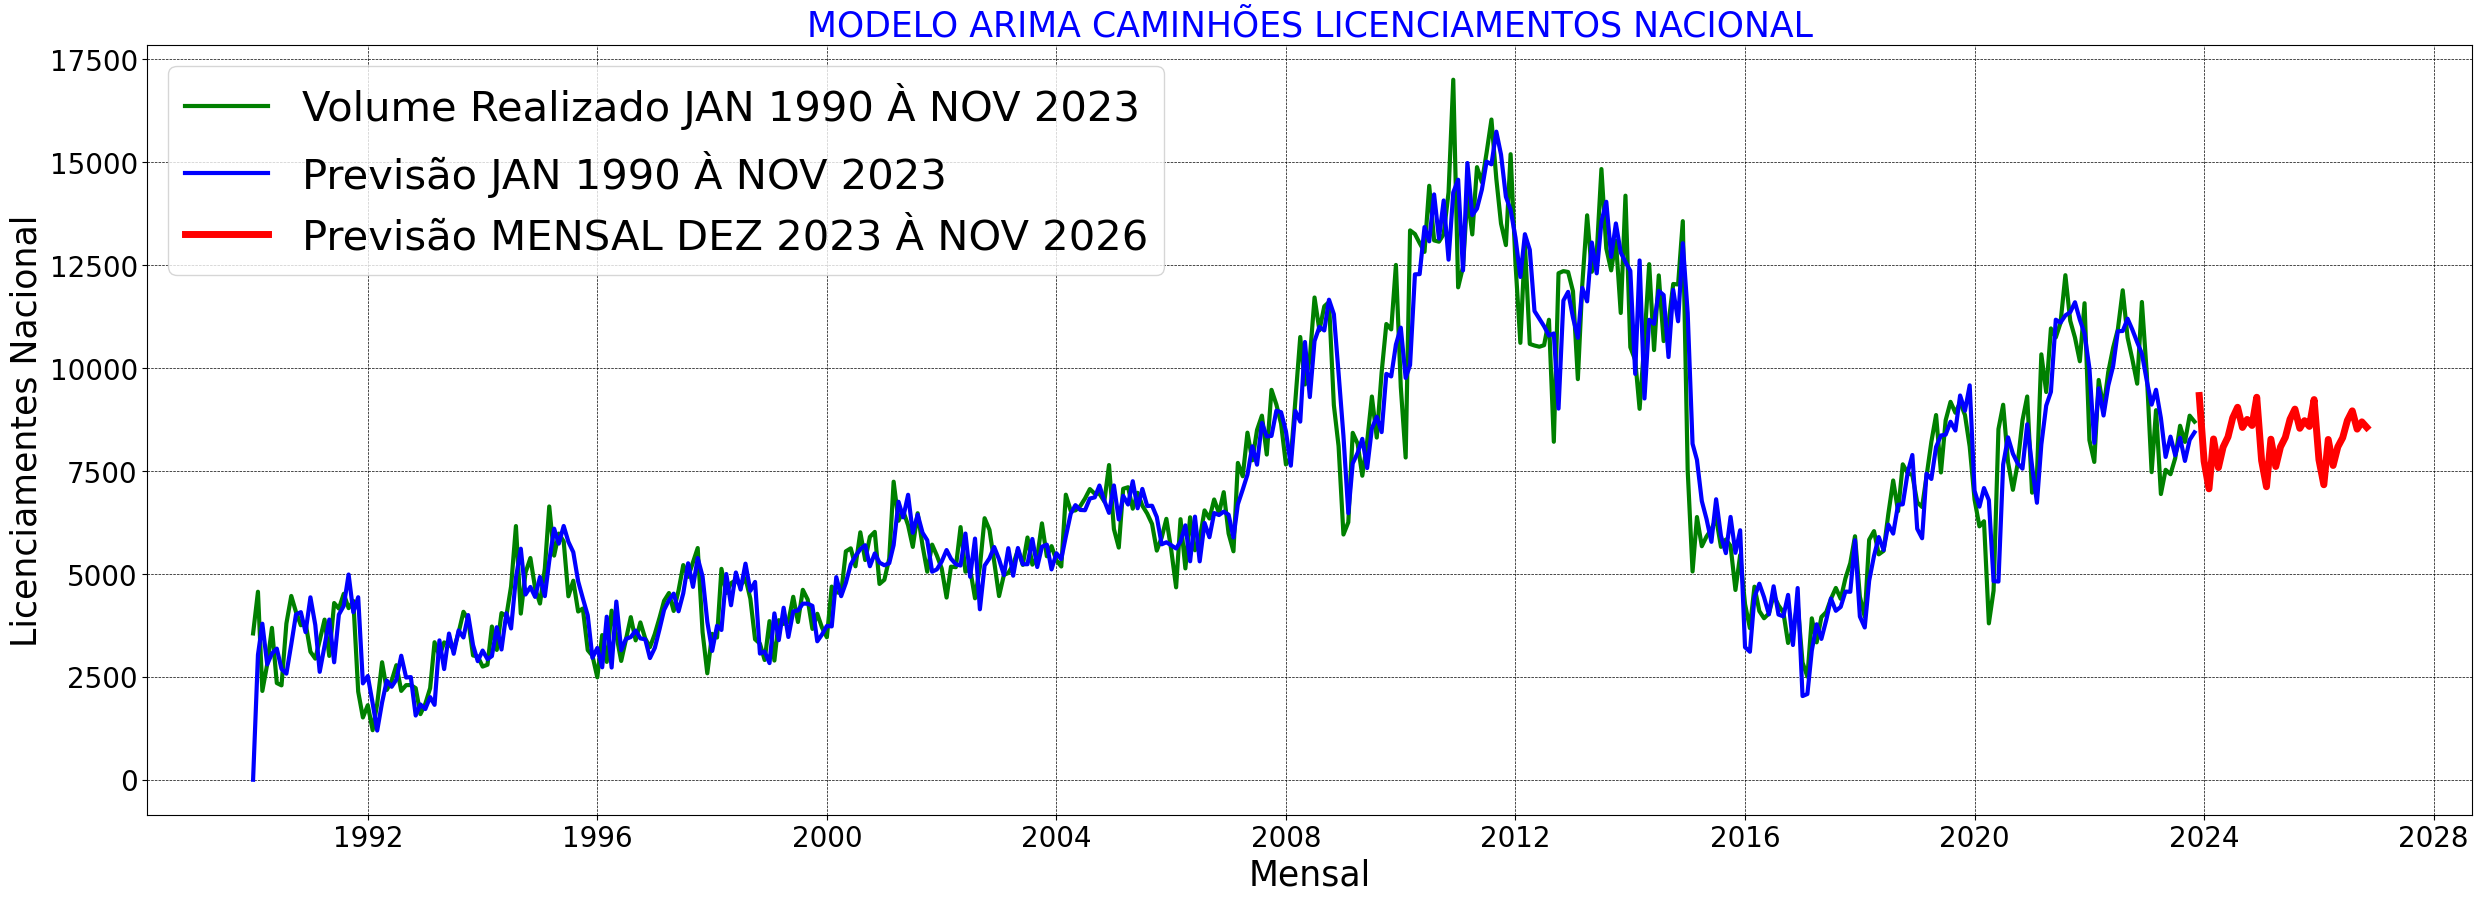

In [36]:
# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (30, 10))
plt.plot(df_1, label='Volume Realizado JAN 1990 À NOV 2023', color= 'g', linewidth = 3)
plt.plot(y_predi, label='Previsão JAN 1990 À NOV 2023', color= 'b', linewidth = 3)
plt.plot(forecast, label='Previsão MENSAL DEZ 2023 À NOV 2026', color='r', linewidth = 5)

# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('w')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Mensal', color = 'black', fontsize = 25)
plt.ylabel('Licenciamentes Nacional', color ='black', fontsize = 25)
plt.legend(fontsize = 30)
plt.title('MODELO ARIMA CAMINHÕES LICENCIAMENTOS NACIONAL', color = 'b', fontsize = 25)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  ='black', labelsize = '20')
plt.tick_params(axis = 'y', colors = 'black', labelsize = '20')

plt.show()

In [37]:
# CALCULAR MÉTRICAS DE ERROS
mse_a = mean_squared_error(y1, y_predi)
mae_a = mean_absolute_error(y1, y_predi)
mape_a = mean_absolute_percentage_error(y1, y_predi)


In [38]:
# IMPRIMIR MÉTRICAS DE ERROS
print('Mean squared error: ', mse_a)
print('Mean absolute error: ', mae_a)
print('Mean absolute percentage error: ', mape_a)

Mean squared error:  897741.1412235765
Mean absolute error:  700.4037966582044
Mean absolute percentage error:  0.12206621132452683


In [39]:
import math
rmse_a = math.sqrt(mse_a)
print('RMSE: %f' % rmse_a)

RMSE: 947.492027


In [40]:
data2 = pd.read_excel('y_pred_prev_licam_arima_JULHO_2023.xlsx')
data2

,mês,periodo,Licenciamentos,Previsão,Resíduos
0,1990-01-01,1,3554,0.000000,-3554.000000
1,1990-02-01,2,4567,3034.468329,-1532.531671
2,1990-03-01,3,2157,3790.219193,1633.219193
3,1990-04-01,4,2808,2801.054020,-6.945980
4,1990-05-01,5,3689,3068.898824,-620.101176
...,...,...,...,...,...
402,2023-07-01,403,7811,7880.345432,69.345432
403,2023-08-01,404,8600,8310.058048,-289.941952
404,2023-09-01,405,8207,7745.735842,-461.264158
405,2023-10-01,406,8845,8256.207429,-588.792571


In [41]:
import pandas as pd


# Calcular o erro percentual
data2['Erro Percentual'] = ((data2['Previsão'] - data2['Licenciamentos']) / data2['Licenciamentos']) * 100

# Criar o KPI
data2['KPI'] = data2['Erro Percentual'].apply(lambda x: 'Dentro da Meta' if abs(x) <= 12 else 'Fora da Meta')

# Imprimir o DataFrame resultante
print(data2[['mês', 'periodo', 'Licenciamentos', 'Previsão', 'Erro Percentual', 'KPI']])


           mês  periodo  Licenciamentos     Previsão  Erro Percentual  \
0   1990-01-01        1            3554     0.000000      -100.000000   
1   1990-02-01        2            4567  3034.468329       -33.556638   
2   1990-03-01        3            2157  3790.219193        75.717162   
3   1990-04-01        4            2808  2801.054020        -0.247364   
4   1990-05-01        5            3689  3068.898824       -16.809465   
..         ...      ...             ...          ...              ...   
402 2023-07-01      403            7811  7880.345432         0.887792   
403 2023-08-01      404            8600  8310.058048        -3.371418   
404 2023-09-01      405            8207  7745.735842        -5.620375   
405 2023-10-01      406            8845  8256.207429        -6.656784   
406 2023-11-01      407            8699  8440.514278        -2.971442   

                KPI  
0      Fora da Meta  
1      Fora da Meta  
2      Fora da Meta  
3    Dentro da Meta  
4      Fora d

In [42]:
import pandas as pd

# Supondo que 'data2' é o seu DataFrame
# Certifique-se de que a coluna 'mês' seja do tipo datetime antes de prosseguir
data2['mês'] = pd.to_datetime(data2['mês'])

# Filtrar os últimos 12 meses
ultimos_12_meses = data2[data2['mês'] >= data2['mês'].max() - pd.DateOffset(months=11)]

# Calcular o erro percentual
ultimos_12_meses['Erro Percentual'] = ((ultimos_12_meses['Previsão'] - ultimos_12_meses['Licenciamentos']) / ultimos_12_meses['Licenciamentos']) * 100

# Criar o KPI
ultimos_12_meses['KPI'] = ultimos_12_meses['Erro Percentual'].apply(lambda x: 'Dentro da Meta' if abs(x) <= 12 else 'Fora da Meta')

# Imprimir o DataFrame resultante
print(ultimos_12_meses[['mês', 'periodo', 'Licenciamentos', 'Previsão', 'Erro Percentual', 'KPI']])


           mês  periodo  Licenciamentos      Previsão  Erro Percentual  \
395 2022-12-01      396           11607  10352.862338       -10.805011   
396 2023-01-01      397            9877   9695.391628        -1.838700   
397 2023-02-01      398            7473   9113.427862        21.951397   
398 2023-03-01      399            8978   9475.008821         5.535852   
399 2023-04-01      400            6941   8784.730720        26.562898   
400 2023-05-01      401            7529   7842.687864         4.166395   
401 2023-06-01      402            7422   8336.053179        12.315456   
402 2023-07-01      403            7811   7880.345432         0.887792   
403 2023-08-01      404            8600   8310.058048        -3.371418   
404 2023-09-01      405            8207   7745.735842        -5.620375   
405 2023-10-01      406            8845   8256.207429        -6.656784   
406 2023-11-01      407            8699   8440.514278        -2.971442   

                KPI  
395  Dentro da 

In [43]:
import pandas as pd

# Supondo que 'data2' é o seu DataFrame
# Certifique-se de que a coluna 'mês' seja do tipo datetime antes de prosseguir
data2['mês'] = pd.to_datetime(data2['mês'])

# Filtrar os últimos 24 meses
ultimos_24_meses = data2[data2['mês'] >= data2['mês'].max() - pd.DateOffset(months=23)]

# Calcular o erro percentual
ultimos_24_meses['Erro Percentual'] = ((ultimos_24_meses['Previsão'] - ultimos_24_meses['Licenciamentos']) / ultimos_24_meses['Licenciamentos']) * 100

# Criar o KPI
ultimos_24_meses['KPI'] = ultimos_24_meses['Erro Percentual'].apply(lambda x: 'Dentro da Meta' if abs(x) <= 8 else 'Fora da Meta')

# Imprimir o DataFrame resultante
print(ultimos_24_meses[['mês', 'periodo', 'Licenciamentos', 'Previsão', 'Erro Percentual', 'KPI']])


           mês  periodo  Licenciamentos      Previsão  Erro Percentual  \
383 2021-12-01      384           11577  10842.190935        -6.347146   
384 2022-01-01      385            8249   9992.676092        21.138030   
385 2022-02-01      386            7721   8184.446138         6.002411   
386 2022-03-01      387            9713   9510.051020        -2.089457   
387 2022-04-01      388            9020   8848.847135        -1.897482   
388 2022-05-01      389            9908   9574.962957        -3.361294   
389 2022-06-01      390           10498  10049.808682        -4.269302   
390 2022-07-01      391           10941  10896.478220        -0.406926   
391 2022-08-01      392           11891  10902.377702        -8.314038   
392 2022-09-01      393           10743  11200.565805         4.259200   
393 2022-10-01      394           10220  10937.060998         7.016252   
394 2022-11-01      395            9622  10630.324720        10.479367   
395 2022-12-01      396           1160

In [44]:
ultimos_24_meses

,mês,periodo,Licenciamentos,Previsão,Resíduos,Erro Percentual,KPI
383,2021-12-01,384,11577,10842.190935,-734.809065,-6.347146,Dentro da Meta
384,2022-01-01,385,8249,9992.676092,1743.676092,21.138030,Fora da Meta
385,2022-02-01,386,7721,8184.446138,463.446138,6.002411,Dentro da Meta
386,2022-03-01,387,9713,9510.051020,-202.948980,-2.089457,Dentro da Meta
387,2022-04-01,388,9020,8848.847135,-171.152865,-1.897482,Dentro da Meta
388,2022-05-01,389,9908,9574.962957,-333.037043,-3.361294,Dentro da Meta
389,2022-06-01,390,10498,10049.808682,-448.191318,-4.269302,Dentro da Meta
390,2022-07-01,391,10941,10896.478220,-44.521780,-0.406926,Dentro da Meta
391,2022-08-01,392,11891,10902.377702,-988.622298,-8.314038,Fora da Meta
392,2022-09-01,393,10743,11200.565805,457.565805,4.259200,Dentro da Meta


In [66]:
import pandas as pd
import plotly.express as px

# Supondo que 'data2' é o seu DataFrame
# Certifique-se de que a coluna 'mês' seja do tipo datetime antes de prosseguir
data2['mês'] = pd.to_datetime(data2['mês'])

# Filtrar apenas o mês '2023-11-01'
mes_especifico = data2[data2['mês'] == '2023-11-01']

# Calcular o erro percentual absoluto
mes_especifico['Erro Absoluto'] = abs(mes_especifico['Previsão'] - mes_especifico['Licenciamentos'])

# Calcular o erro percentual
mes_especifico['Erro Percentual'] = (mes_especifico['Erro Absoluto'] / mes_especifico['Licenciamentos']) * 100

# Criar o KPI
meta_percentual = 8  # Defina a meta em percentual
mes_especifico['KPI'] = mes_especifico['Erro Percentual'].apply(lambda x: 'Dentro da Meta' if x < meta_percentual else 'Fora da Meta')

# Converter a coluna 'mês' para um formato de data padrão do Python
mes_especifico['mês'] = mes_especifico['mês'].dt.to_pydatetime()

# Selecionar apenas as colunas relevantes
df_plot = mes_especifico[['mês', 'periodo', 'Licenciamentos', 'Previsão', 'Erro Percentual', 'KPI']]

# Criar um gráfico de barras colorido pelo KPI
fig_errokpi = px.bar(df_plot, x='mês', y='Erro Percentual', color='KPI',
                     title='Erro Percentual e KPI para o mês 2023-11-01',
                     labels={'Erro Percentual': 'Erro Percentual (%)', 'mês': 'Mês'},
                     color_discrete_map={'Dentro da Meta': 'green', 'Fora da Meta': 'red'})

# Adicionar anotação da meta
fig_errokpi.add_annotation(xref='paper', yref='y',
                           x=1, y=meta_percentual,
                           text=f'Meta: {meta_percentual}%',
                           showarrow=False,
                           font=dict(color='black', size=20),
                           align='center', ax=0, ay=-40)

# Exibir o gráfico
fig_errokpi.show()


In [67]:
import pandas as pd
import plotly.express as px

# Supondo que 'data2' é o seu DataFrame
# Certifique-se de que a coluna 'mês' seja do tipo datetime antes de prosseguir
data2['mês'] = pd.to_datetime(data2['mês'])

# Filtrar os últimos 24 meses
ultimos_24_meses = data2[data2['mês'] >= data2['mês'].max() - pd.DateOffset(months=23)]

# Calcular o erro percentual absoluto
ultimos_24_meses['Erro Absoluto'] = abs(ultimos_24_meses['Previsão'] - ultimos_24_meses['Licenciamentos'])

# Calcular o erro percentual
ultimos_24_meses['Erro Percentual'] = (ultimos_24_meses['Erro Absoluto'] / ultimos_24_meses['Licenciamentos']) * 100

# Criar o KPI
meta_percentual = 8  # Defina a meta em percentual
ultimos_24_meses['KPI'] = ultimos_24_meses['Erro Percentual'].apply(lambda x: 'Dentro da Meta' if abs(x) <= meta_percentual else 'Fora da Meta')

# Selecionar apenas as colunas relevantes
df_plot = ultimos_24_meses[['mês', 'periodo', 'Licenciamentos', 'Previsão', 'Erro Percentual', 'KPI']]

# Criar um gráfico de barras colorido pelo KPI
fig_errokpi_p = px.bar(df_plot, x='mês', y='Erro Percentual', color='KPI',
                     title='Erro Percentual e KPI ao longo do tempo',
                     labels={'Erro Percentual': 'Erro Percentual (%)', 'mês': 'Mês'},
                     color_discrete_map={'Dentro da Meta': 'green', 'Fora da Meta': 'red'})

# Adicionar anotação da meta
fig_errokpi_p.add_annotation(xref='paper', yref='y',
                           x=1, y=meta_percentual,
                           text=f'Meta: {meta_percentual}%',
                           showarrow=False,
                           font=dict(color='black', size=20),
                           align='center', ax=0, ay=-40)

# Exibir o gráfico
fig_errokpi_p.show()


In [47]:
# Calcule o viés como a diferença média entre as previsões e os valores reais
bias = data2['Previsão'].mean() - data2['Licenciamentos'].mean()

# Calcule a razão do viés como o viés dividido pela média dos valores reais
bias_ratio = bias / data2['Licenciamentos'].mean()

# Exiba o viés e a razão do viés
print('Viés:', bias)
print('Razão do Viés:', bias_ratio)

Viés: -11.487439762622671
Razão do Viés: -0.00169574079167202


O "viés da previsão" refere-se ao erro sistemático na previsão de um modelo, ou seja, uma tendência consistente do modelo de prever valores que são sistematicamente diferentes dos valores reais. Um valor positivo indica que as previsões são consistentemente mais altas do que os valores reais, enquanto um valor negativo indica que as previsões são consistentemente mais baixas do que os valores reais. o viés é baixo -11.487439762622671 licenciamentos no periodo. Pense comigo...são 407 meses, então...-11.487439762622671 x 407 meses = -4.675 licenciamentos que o realizado 2.757.136 licenciamentos, razão do viés 0,17% do total...um exclente modelo...



In [48]:
# Criando o gráfico
fig_licprev = px.line(data2, x='mês', y=['Licenciamentos', 'Previsão'], title='Modelagem Arima: Licenciamentos e Previsão para Caminhões',
              labels={'value': 'Valores', 'variable': 'Variáveis'},
              line_shape='linear')

# Alterando o título do eixo x
fig_licprev.update_layout(xaxis_title='Meses')

# Alterando a fonte e o tamanho de letra do título
fig_licprev.update_layout(title_font=dict(family='Arial', size=24))


# Exibindo o gráfico
fig_licprev.show()

In [49]:
# Criando o gráfico
fig_residuos = px.scatter(data2, x="mês", y="Resíduos", title='Modelagem Arima: Resíduos para Caminhões')

# Personalizando a aparência
fig_residuos.update_traces(marker=dict(color='red', size=12),  # Altera a cor e o tamanho do marcador
                  marker_line=dict(width=2, color='blue'),  # Adiciona uma borda ao marcador
                  line=dict(color='green', width=2),  # Adiciona uma linha de ligação entre os pontos
                  selector=dict(mode='markers+lines'))  # Define o modo de exibição para marcadores e linhas

fig_residuos.update_layout(font=dict(family="Arial", size=18, color="purple"))  # Altera a fonte, tamanho e cor do texto do layout
fig_residuos.update_xaxes(title_font=dict(family="Courier", size=18, color="navy"))  # Altera a fonte, tamanho e cor do título do eixo x
fig_residuos.update_yaxes(title_font=dict(family="Courier", size=18, color="navy"))  # Altera a fonte, tamanho e cor do título do eixo y

# Exibindo o gráfico
fig_residuos.show()

In [50]:
prev_ano = pd.read_excel('Licenciamentos_Real_Previsão_2023_2024_2025.xlsx')
# Format the 'Ano' column as a year
prev_ano['Ano'] = pd.to_datetime(prev_ano['Ano'], format='%Y').dt.year
prev_ano

,Ano,Licenciamentos
0,2000,61624
1,2001,70509
2,2002,63510
3,2003,64351
4,2004,79357
5,2005,76584
6,2006,72675
7,2007,95277
8,2008,118237
9,2009,106454


In [51]:
# Assume prev_ano is your DataFrame
fig_box = px.box(prev_ano, y="Licenciamentos")

# Update layout to customize appearance
fig_box.update_layout(
    title="Licenciamentos Box Plot",
    xaxis_title="Ano",
    yaxis_title="Licenciamentos",
    font=dict(family="Arial", size=16, color="darkblue"),  # Font style for title and axis labels
    title_font=dict(family="Arial", size=24, color="black"),  # Font style for title
    paper_bgcolor="lightgray",  # Background color of the plot
    plot_bgcolor="white",  # Background color of the plot area
)

# Update traces to customize box plot appearance
fig_box.update_traces(
    marker=dict(color="green", line=dict(color="darkblue", width=2)),  # Box color and outline
    boxmean="sd",  # Show standard deviation as error bars
)

# Show the plot
fig_box.show()


In [52]:

# Assume prev_ano is your DataFrame
fig_hist = px.histogram(prev_ano, x="Licenciamentos")

# Update traces to customize histogram appearance
fig_hist.update_traces(
    marker_color="purple",  # Bar color
    opacity=0.7,  # Bar opacity
)

# Update layout to customize appearance
fig_hist.update_layout(
    title="Licenciamentos Histogram",
    xaxis_title="Licenciamentos",
    yaxis_title="Count",
    font=dict(family="Arial", size=16, color="darkblue"),  # Font style for title and axis labels
    title_font=dict(family="Arial", size=24, color="black"),  # Font style for title
    paper_bgcolor="lightgray",  # Background color of the plot
    plot_bgcolor="white",  # Background color of the plot area
)

# Show the plot
fig_hist.show()


In [53]:
import plotly.express as px

# Assume prev_ano is your DataFrame
fig_line = px.line(prev_ano, x='Ano', y='Licenciamentos')

# Update traces to customize line plot appearance
fig_line.update_traces(
    line=dict(color='red', width=2),  # Line color and width
)

# Update layout to customize appearance
fig_line.update_layout(
    title="Licenciamentos Over Years",
    xaxis_title="Year",
    yaxis_title="Licenciamentos",
    font=dict(family="Arial", size=16, color="darkblue"),  # Font style for title and axis labels
    title_font=dict(family="Arial", size=24, color="black"),  # Font style for title
    paper_bgcolor="lightgray",  # Background color of the plot
    plot_bgcolor="white",  # Background color of the plot area
)

# Show the plot
fig_line.show()



In [54]:
# Assume prev_ano is your DataFrame
fig_scatter = px.scatter(prev_ano, x="Ano", y="Licenciamentos")

# Update traces for marker color and size
fig_scatter.update_traces(marker=dict(color="red", size=15))

# Update layout for title and axis labels
fig_scatter.update_layout(
    title="Licenciamentos Over Years",
    xaxis_title="Year",
    yaxis_title="Licenciamentos",
    font=dict(family="Arial", size=16, color="darkblue"),  # Font style for title and axis labels
    title_font=dict(family="Arial", size=24, color="black"),  # Font style for title
    paper_bgcolor="lightgray",  # Background color of the plot
    plot_bgcolor="white",  # Background color of the plot area
)

# Show the plot
fig_scatter.show()


In [55]:
import pandas as pd


# Calculando a média da coluna 'Licenciamentos'
media_licenciamentos = prev_ano['Licenciamentos'].mean()

# Exibindo a média
print(f'Média dos Licenciamentos: {media_licenciamentos}')


Média dos Licenciamentos: 96799.58333333333


In [56]:
import pandas as pd


# Calculando a média da coluna 'Licenciamentos'
desviopadrão_licenciamentos = prev_ano['Licenciamentos'].std()

# Exibindo a média
print(f'Desvio Padrão dos Licenciamentos: {desviopadrão_licenciamentos}')


Desvio Padrão dos Licenciamentos: 34537.634913005524


In [57]:
cv = desviopadrão_licenciamentos/media_licenciamentos
cv

0.3567952848936732

In [58]:
import pandas as pd
from scipy.stats import norm


# Definindo um valor específico para calcular a probabilidade
valor_especifico = 100003  # Substitua pelo valor desejado

# Calculando a probabilidade usando a distribuição normal
probabilidade = norm.cdf(valor_especifico, media_licenciamentos , desviopadrão_licenciamentos)

# Exibindo a probabilidade
print(f'A probabilidade de o volume ser menor que {valor_especifico} é de {probabilidade:.4f}')


A probabilidade de o volume ser menor que 100003 é de 0.5369


In [59]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 100003  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2024 = go.Figure()

# Adicionando a curva CDF
fig_prob2024.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2024.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2024.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2024.show()

In [60]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Definindo um valor específico para calcular a probabilidade
valor_especifico = 100129  # Substitua pelo valor desejado

# Gerando dados para a distribuição normal
x = np.linspace(media_licenciamentos - 3 * desviopadrão_licenciamentos, media_licenciamentos + 3 * desviopadrão_licenciamentos, 1000)
y = norm.cdf(x, media_licenciamentos, desviopadrão_licenciamentos)

# Calculando a probabilidade para o valor específico
probabilidade = norm.cdf(valor_especifico, media_licenciamentos, desviopadrão_licenciamentos)

# Criando o gráfico de densidade de probabilidade acumulada (CDF)
fig_prob2025 = go.Figure()

# Adicionando a curva CDF
fig_prob2025.add_trace(go.Scatter(x=x, y=y, mode='lines', name='CDF'))

# Destacando o ponto específico no gráfico
fig_prob2025.add_trace(go.Scatter(x=[valor_especifico, valor_especifico], y=[0, probabilidade],
                         mode='lines', name=f'Probabilidade: {probabilidade:.4f}',
                         line=dict(color='red', dash='dash')))

# Layout do gráfico
fig_prob2025.update_layout(title=f'Probabilidade Cumulativa (CDF) - Valor Específico: {valor_especifico}',
                  xaxis_title='Licenciamentos',
                  yaxis_title='Probabilidade Cumulativa',
                  font=dict(family="Arial", size=12, color="darkblue"),  # Font style for title and axis labels
                  title_font=dict(family="Arial", size=12, color="black"),  # Font style for title
                  paper_bgcolor="lightgray",  # Background color of the plot
                  plot_bgcolor="white",  # Background color of the plot area
                  showlegend=True)

# Exibição do gráfico
fig_prob2025.show()

# PROBABILIDADE DOS LICENCIAMENTOS CAMINHÕES 2023 >=  99.716 É 31,8%

# PROBABILIDADE DOS LICENCIAMENTOS CAMINHÕES 2024 >= 100.129 É 31,4%

# PROBABILIDADE DOS LICENCIAMENTOS CAMINHÕES 2025 >= 100.003 É 31,5%

In [68]:
# Importando as bibliotecas necessárias
from datetime import datetime
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

# Inicializando o aplicativo Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])

# Layout do aplicativo
app.layout = dbc.Container(
    [
        dbc.Tabs(
            [
                dbc.Tab(
                    label='Capa',
                    tab_id='tab-1',
                    children=[
                        dbc.Card(  # Adicionando um card como moldura
                            dbc.Row(
                                [
                                    dbc.Col(html.Img(src='https://2.bp.blogspot.com/-wDTStp-U4KY/VImjNp6Na4I/AAAAAAAAPeo/26Nxra5fmL0/s1600/20140225_a31615200e50468aa3885a3b77f2df39_foto-33.jpg',
                                                     style={'width': '50%'}), width=10),
                                    dbc.Col(
                                        [
                                            html.H1("Modelagem Arima: Previsão de Demanda para Caminhões"),
                                            dbc.Badge('Sales & Operation Planning (S&OP)', color='success', className='ms-1',
                                                      style={'font-size': '24px'})
                                        ],
                                        width=12,
                                    ),
                                ]
                            ),
                            style={'padding': '20px'}  # Adicionando espaçamento interno ao card
                        ),

                        dbc.Row(
                            dbc.Col(
                                dbc.Card(
                                    dbc.CardBody(
                                        [
                                            html.H4("Data e Hora Atuais", className="card-title"),
                                            html.P(id="current-time", className="card-text"),
                                            dcc.Interval(
                                                id="interval-component",
                                                interval=1000,  # Atualiza a cada 1000 milissegundos (1 segundo)
                                                n_intervals=0,
                                            ),
                                        ]
                                    ),
                                    style={'padding': '20px'}  # Adicionando espaçamento interno ao card
                                )
                            )
                        ),
                    ]
                ),

                # Resultado Previsão Novembro/2023
                dbc.Tab(
                    label='Resultado Previsão Novembro/2023',
                    tab_id='tab-2',
                    children=[
                        dbc.Card(  # Adicionando um card como moldura
                            dbc.Row(
                                [
                                    dbc.Col(
                                        dbc.Card(  # Adicionando um card como moldura
                                            dbc.CardBody(
                                                [
                                                    html.H1("Resultado Previsão Novembro/2023", style={'font-size': '30px'}),
                                                    html.P(),
                                                ]
                                            ),
                                            style={'padding': '20px'}  # Adicionando espaçamento interno ao card
                                        ),
                                    )
                                ]
                            ),
                            style={'padding': '20px'}  # Adicionando espaçamento interno ao card
                        ),

                        dbc.Row(
                            [
                                dbc.Col(
                                    dbc.Card(  # Adicionando um card como moldura
                                        dbc.CardBody(
                                            [
                                                html.H4("8.439 Licenciamentos", className="card-title"),
                                                html.P("Previsão", className="card-text",
                                                       style={'font-family': 'Arial, sans-serif', 'font-size': '30px'}),
                                            ]
                                        ),
                                        style={'padding': '20px'}  # Adicionando espaçamento interno ao card
                                    ),
                                    width=4,
                                ),
                                dbc.Col(
                                    dbc.Card(  # Adicionando um card como moldura
                                        dbc.CardBody(
                                            [
                                                html.H4("8.699 Licenciamentos", className="card-title"),
                                                html.P("Realizado", className="card-text",
                                                       style={'font-family': 'Arial, sans-serif', 'font-size': '30px'}),
                                            ]
                                        ),
                                        style={'padding': '20px'}  # Adicionando espaçamento interno ao card
                                    ),
                                    width=4,
                                ),
                                dbc.Col(
                                    dbc.Card(  # Adicionando um card como moldura
                                        dbc.CardBody(
                                            [
                                                html.H4('3%', className='card-title'),
                                                html.P('Erro', className='card-text',
                                                       style={'font-family': 'Arial, sans-serif', 'font-size': '30px'}), 
                                                html.P(),
                                            ]
                                        ),
                                        style={'padding': '20px'}  # Adicionando espaçamento interno ao card
                                    ),
                                    width=4,
                                ),
                                
                                dbc.Col(dcc.Graph(id='bar-erro%', figure=fig_errokpi), width=12), html.P(),
                            ],
                            style={'padding': '20px'}  # Adicionando espaçamento interno ao card
                        )
                    ],
                    
                    
                    
                ),
                
                dbc.Tab(
                label='Modelagem Arima',
                tab_id='tab-3',
                children=[
                    
                    dbc.Card(
            dbc.Row(
                [
                    dbc.Col(
                        dbc.Card(
                            dbc.CardBody(
                                [
                                    html.H1('Modelagem Arima: Previsão Mensal (36 meses)', style={'font-size':'30px'}),
                                    html.P(),                                
                                ]
                            ),
                            style={'padding': '20px'}
                        ),
                    )
                ]    
            )
        ),
        
        dcc.Markdown(
            
        """
        *O gráfico de decomposição sazonal é essencial para definir qual modelo utilizar para gerar a previsão de demanda.
        
        *Observa-se a tendência e sazonalidade.
        
        *O gráfico da previsão mensal apresenta a previsão para os próximos 36 meses.
        
        *Além disso, apresenta-se a previsão em forma de tabela.
        
        """,
        style={'font-family': 'Arial, sans-serif', 'font-size': '16px', 'font-weight': 'bold'}
        ),
                    
        dbc.Row(
            [
                dbc.Col(dcc.Graph(id='line-decomposition', figure=fig_seasonal), width=12), html.P(),
            ]
        ),

        
        # Adicionando Gráfico Previsão Mensal
        dbc.Row([
            dbc.Col(dcc.Graph(id='line-plot-previsão', figure=fig_previsão), width=6), 
            
            dbc.Col(dcc.Graph(id='tabela-previsão', figure=figura_tabela), width=6), html.P(),
            
            ]     
        ),
        
        
        #Adicionando análise performance
        
        dbc.Card(
            dbc.Row(
                [
                    dbc.Col(
                        dbc.Card(
                            dbc.CardBody(
                                [
                                    html.H1('Modelagem Arima: Análise da Performance', style={'font-size': '30px'}),
                                    html.P(),
                                ]                                
                            ),
                            style={'padding': '20px'}
                        ),
                    )
                    
                ]
            )
        ),
        
        #Adicionando Gráfico de licenciamentos x previsão amostra e resíduos
        
        dbc.Row(
            [
                dbc.Col(dcc.Graph(id='line-plot-licenciamentos-previsão', figure=fig_licprev), width=6), 
                
                
                dbc.Col(dcc.Graph(id='scatter-plot-resíduos', figure=fig_residuos), width= 6),
                html.P(),
            ]
        ),
        
        
        
        dbc.Row(
            [
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody(
                            [
                                html.H4('12.2%', className='card-title'),  # Corrigido aqui
                                html.P('MAPE', className='card-text',  # Corrigido aqui
                                       style={'font-family': 'Arial, sans-serif', 'font-size': '30px'}),
                            ]
                        ),
                        style={'padding': '20px'}  # Adicionando espaçamento interno ao card
                    ),
                    width=4
                ),
                
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody(
                            [
                                html.H4('700 Licenciamentos', className='card-title'),
                                html.P('MAE', className='card-text',
                                      style={'font-family': 'Arial, sans-serif', 'font-size': '30px'}),
                            ]
                        ),
                        style={'padding': '20px'}
                    ),
                    width=4
                ),
                
                dcc.Markdown(
                """
                O "viés da previsão" refere-se ao erro sistemático na previsão de um modelo,
                ou seja, uma tendência consistente do modelo de prever valores que são sistematicamente 
                diferentes dos valores reais. Um valor positivo indica que as previsões são consistentemente 
                mais altas do que os valores reais, enquanto um valor negativo indica que as previsões 
                são consistentemente mais baixas do que os valores reais. O viés é baixo -11.487439762622671 licenciamentos
                no periodo. Pense comigo...são 407 meses, então...-11.487439762622671 x 407 meses = -4.675 licenciamentos 
                que o realizado 2.757.136 licenciamentos, razão do viés 0,17% do total...um exclente modelo...               
                
                """, style={'font-family': 'Arial, sans-serif', 'font-size': '16px', 'font-weight': 'bold'}
                ),
                
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody(
                            [
                                html.H4('-11', className='card-title'),
                                html.P('Viés ou Bias', className='card-text',
                                      style={'font-family':'Arial, sans-serif', 'font-size': '30px'}),
                                html.P(),
                            ]
                        ),
                        style={'padding': '20px'}
                    ),
                    width=4
                ),
                
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody(
                            [
                                html.H4('-0,17%', className='card-title'),
                                html.P('Razão do Viés', className='card-text',
                                      style={'font-family':'Arial, sans-serif', 'font-size': '30px'}),
                                html.P(),
                            ]
                        ),
                        style={'padding': '20px'}
                    ),
                    width=4
                )

            ]
        ),
                dbc.Row(
                    [
                    
                    dbc.Col(html.H2('KPI Erro Previsão %')), html.P(),
                    dcc.Markdown(
                    """
                    *Uma forma de avaliar a qualidade de uma previsão é usar o indicador de desempenho (KPI) 
                    do erro da previsão. 
                    
                    *Esse KPI mede a diferença entre o valor previsto e o valor real de uma variável,
                    como vendas, demanda ou lucro.
                    
                    *Quanto menor o erro da previsão, melhor a precisão da previsão. 
                    
                    *O erro da previsão é importante porque pode afetar a tomada de decisão
                    e o planejamento estratégico de uma organização.
                    
                    """, style={'font-family': 'Arial, sans-serif', 'font-size': '16px', 'font-weight': 'bold'}), 
                        html.P(),    
                    
                    dbc.Col(dcc.Graph('bar-erro-kpi', figure=fig_errokpi_p), width=12), html.P(),
                ]
                ),
               
                    
                ]
                ),
                
                dbc.Tab(
                label='Análise Previsão Licenciamentos Over Year',
                tab_id='tab-4',
                children=[
                    
                    dbc.Card(
            dbc.Row(
                [
                    dbc.Col(
                        dbc.Card(
                            dbc.CardBody(
                                [
                                    html.H1('Modelagem Arima: Análise Previsão Licenciamentos Over Year',
                                           style={'font-size': '30px'}),
                                    html.P(),
                                ]
                            ),
                            style={'padding': '20px'}
                        )
                    )
                ]
            )
        ),
        
        dcc.Markdown(
        """
        A análise da previsão anual é essencial para o S&OP, visto que a avaliação da previsão indica
        se a tendência da previsão é crescimento, estabilidade ou crescimento.
        Além disso, a compreensão da probabilidade indica qual o nível de risco, 
        já que uma probabilidade pequena mostra o alto risco, mas prêmio alto 
        ou probabilidade alta risco baixo da previsão, mas prêmio baixo.        
        """, style={'font-family': 'Arial, sans-serif', 'font-size': '16px', 'font-weight': 'bold'}),
                    
           dbc.Card(    
            dbc.Row(
            [
                
                    
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody(
                            [
                                html.H4('99.716 Licenciamentos', className='card-title'),                                       
                                html.P('Previsão 2023  17% < 2022', className='card-text',
                                      style={'font-family': 'Arial - sans-serif', 'font-size': '30px'})                                
                            ]
                        ),
                        style={'padding': '20px'}
                    ),
                    width=4,
                ),
                
                
               
               
               
                   dbc.Col(
            dbc.Card(
                dbc.CardBody(
                    [
                        html.H4('100.129 Licenciamentos', className='card-title'),
                        html.P('Previsão 2024  0,4% > 2023', className='card-text',
                              style={'font-family': 'Arial - sans-serif', 'font-size': '30px'})
                    ]
                ),
                style={'padding': '20px'}
            ),
            width=4,
        ),
               
                
                
            
            
                dbc.Col(
            dbc.Card(
                dbc.CardBody(
                    [
                        html.H4('100.003 Licenciamentos', className='card-title'),
                        html.P('Previsão 2025 = 2024', className='card-text',
                              style= {'font-family': 'Arial - sans-serif', 'font-size': '30px'}),
                        html.P()
                    ]
                ),
                style={'padding': '20px'}
            ),
            width=4
        ),             
                             
            
            
            
        ]
        
    ),
        
        
        ), html.P(),      
            
        
              
        dbc.Card(
            dbc.Row(
                [
                 
                    dbc.Col(dcc.Graph(id='line-prob-2024', figure=fig_prob2024), width=6),
                    dbc.Col(dcc.Graph(id='line-prob-2025', figure=fig_prob2025), width=6), html.P(),
                    
                ]
            )
        ),       
        
         
        dbc.Row(
            [
                dbc.Col(dcc.Graph(id='scatter-plot-ano', figure=fig_scatter), width=15),
                html.P(),
                dcc.Markdown(
                """
                Você deve estar se perguntando a utilidade dos gráficos BoxPlot e Histograma. 
                Não pretendo abordar  a teoria, mas como pode-se utilizá-los. O BoxPlot detalha 
                o comportarmento da série temporal, visto que pode-se identificar média, mediana, mínimo,
                máximo, q1 e q3; já o histograma apresenta a contagem. 
                Vamos supor que na discussão de S&OP há questionamentos sobre a previsão, há uma sugestão
                que o volume para 2024 será igual a 150.000 licenciamentos. A análise do BoxPlor vai indicar
                que 150k está muito próximo do máximo, então a probabilidade será muito pequena e o risco será
                muito alto e o histograma vai mostrar que no periode de 13 anos ocorreu apenas dois valores 140 e 159k.
                A decisão de um comitê de S&OP é soberana, pois há questões estratégicas. Contudo, o papel do S&OP
                é ter um pensamento crítico, questionador...mas sempre com base em informações qualificadas e visuais
                """, style={'font-family': 'Arial, sans-serif', 'font-size': '16px', 'font-weight': 'bold'}),
                
                dbc.Col(dcc.Graph(id='boxplot-plot-ano', figure=fig_box), width=6),
                
                dbc.Col(dcc.Graph(id='histogrma-plot-ano', figure=fig_hist),width=6),
                html.P()
            ]
        ),
                    
                ]
                ),
                
            ]
        ),
    ],
    fluid=True
)

      # Atualização da data e hora
@app.callback(
    Output("current-time", "children"),
    Input("interval-component", "n_intervals"),
)
def update_time(n):
    current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return f"Data e Hora Atuais: {current_time}"

# Executando o aplicativo Dash
if __name__ == "__main__":
    app.run_server(debug=True, port=8099)
